In [1]:
import numpy as np
import pandas as pd
import matplotlib
import gsw

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

- **TS diagram**을 그리기 위한 **Python package 목록(numpy, pandas, gsw, matplotlib)**
- Python이 설치되어 있는 환경에 **pip install package** 필요(cmd or anaconda)
- 그래프를 그릴 때 사용되는 **Matplotlib의 pyplot을 plt로 가져오기**
- Matplotlib의 그림에서 tick수를 설정할 때 사용되는 **MaxNLocator 클래스를 사용**
<br>
***

In [3]:
data = pd.read_csv('../data/JOISS_data_preprocessing.csv', encoding = 'euc-kr')

In [4]:
ts = data[['Temperature [℃]', 'Salinity [PSU]']]

In [5]:
df = ts.sort_values('Temperature [℃]', ascending = True)

- DataFrame으로 불러온 JOISS dataset에서 **'온도'**와 **'염분'**만 추출
- 온도를 기준으로 값을 **오름차순으로 정렬**
<br>
***

In [6]:
mint = np.min(df['Temperature [℃]'])
maxt = np.max(df['Temperature [℃]'])

In [7]:
mins = np.min(df['Salinity [PSU]'])
maxs = np.max(df['Salinity [PSU]'])

In [8]:
tempL = np.linspace(mint, maxt, 5218)

In [9]:
salL = np.linspace(mins, maxs, 5218)

- **np.min()과 np.max()는** 리스트 안에 최솟값과 최댓값을 반환해주는 함수
- **np.linspace 함수는** 1차원의 배열 만들기, 그래프 그리기에서 수평축의 간격 만들기 등에 매우 편리
  - np.linspace(start, stop, num)는 **start와 stop 사이를 num이라는 간격으로** 요소를 만들 것인지 설정하는 code
  - **염분과 온도의 최솟값과 최댓값을 기준으로** JOISS 자료의 갯수만큼 설정(JOISS 자료는 현재 **5218 rows x 79 columns 구조**)
<br>
***

In [10]:
Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 5218)

- **np.meshgrid 함수는** 2차원의 평면에 정사각형 혹은 직사각형의 grid를 생성해주는 함수
- **gsw 패키지는** TEOS-10 (Thermodynamic Equation of Seawater 2010)을 기반으로 하는 패키지
  - **gsw.sigma0()는** potential density anomaly 값(potential density - 1000 kg/m3)
<br>
<br>

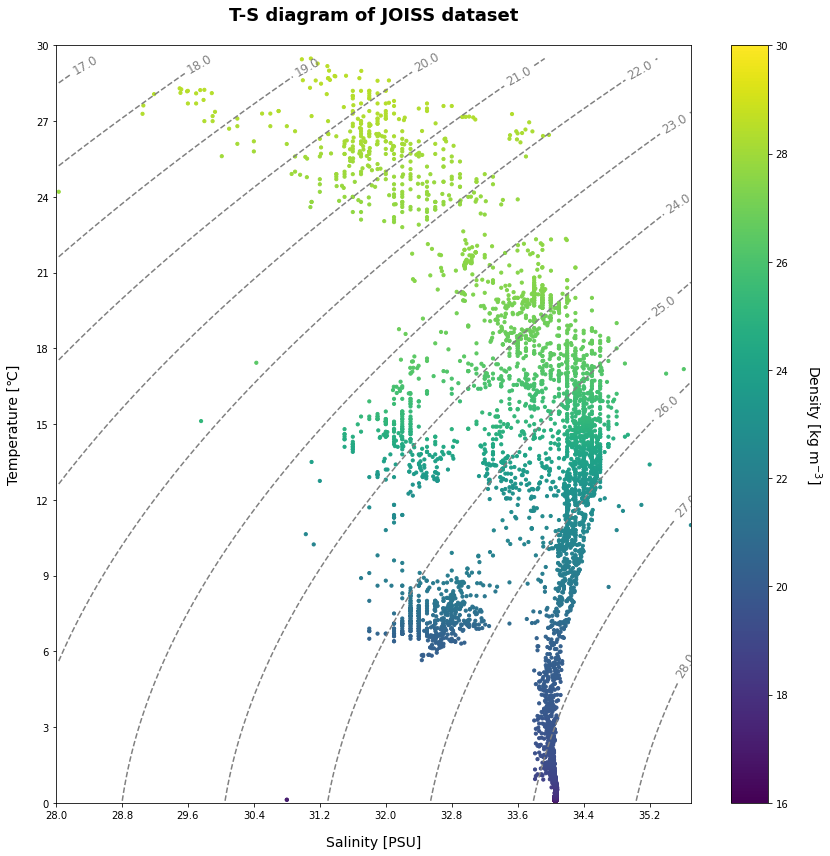

In [11]:
fig, ax = plt.subplots(figsize = (12,12))
cs = ax.contour(Sg, Tg, sigma_theta, linestyles = 'dashed', colors = 'grey', levels = np.arange(16,30,1))
cl = plt.clabel(cs, fontsize = 12, inline = True, fmt = '%.1f')

sc = plt.scatter(df['Salinity [PSU]'], df['Temperature [℃]'], c=cnt, s=10)
cb = plt.colorbar(sc)

ax.set_xlabel("Salinity [PSU]", fontsize=14, labelpad=15)
ax.set_ylabel("Temperature [℃]", fontsize=14, labelpad=15)
ax.set_title('T-S diagram of JOISS dataset',fontsize=18, fontweight='bold', pad=25)

ax.xaxis.set_major_locator(MaxNLocator())
ax.yaxis.set_major_locator(MaxNLocator(nbins=10))
ax.tick_params(direction='out')

cb.ax.tick_params(direction='out')
cb.set_label("Density [kg m$^{-3}$]", fontsize=14, rotation=270, labelpad=35)
plt.clim(16, 30)

plt.tight_layout()
plt.xlim([28,35.7])
plt.ylim([0,30])
plt.savefig('ts_diagram.png',format='png',dpi=300,transparent=False)

plt.show()

- **plt.subplot과 plt.subplots** 모두 한번에 여러 그래프를 보여주기 위해 사용되는 코드
  - subplot은 일일이 다 설정이 필요, 반면 subplots는 한번에 설정 가능(그림이 많아질수록 유리)
- **subplots()에선** 2개의 값을 받을 수 있음**(fig와 ax)**
  - fig는 figure로 전체 subplot을 말함(몇 개의 그래프가 있는지 상관없이 그걸 담는 전체 그래프)
  - ax는 axe로써 전체 중 낱낱개를 의미(subplots 안에 2개(a1, a2)의 그래프가 있다면 a1, a2를 일컫음)
- **plt.contour()는** 지도에서 등고선과 같은 개념으로 TS diagram에서 **'등밀도선'을** 그리기 위함
  - plt.contour(x, y, z)의 x, y, z는 모두 2차원의 np.array여야 함
  - x, y의 경우는 np.meshgrid로 생성 가능
  - linstyles로 등고선의 종류, colors는 등고선의 색깔
  - levels는 z (sigma_theta)의 범위와 간격을 지정
- **plt.clabel**
  - fontsize 설정, inline은 True일 경우 값이 선 중간에 표기, False일 경우 선 위에 표기
  - fmt은 '%.1f'로 소숫점 첫째자리까지 표기
---
- **plt.scatter는** 산점도를 그리는 함수
  - x, y에 염분(df['Salinity PSU']과 온도(df['Temperature [℃]'])를 입력
  - c는 scatter 함수 각 점의 색을 표시하는 매개변수로, cnt라는 변수를 입력하여 sigma_theta 값에 대응하는 색을 매칭
- **plt.colobar를** 통해 scatter 및 contour subplot 옆에 colobar를 표기
---
- **plt.set_xlabel, plt.set_ylabel**
  - x축과 y축의 label을 설정
  - 축 제목, fontsize 설정
  - labelpad를 통해 축과 제목간의 간격 설정
- **plt.set_title**
  - 전체 subplot의 제목, fontsize, bold, 간격 설정
---
- **plt.xaxis.set_major_loactor(MaxNLocator(nbins))**
  - set_major_loactor를 통해 axis의 틱 간격을 정함
  - MaxNLocator로 틱 수를 정하며, 틱 수는 nbins라는 매개변수로 가능
- **plt.tick_params**
  - aixs='both' 설정하면 x축과 y축 parameter 설정 가능
  - direction='out'을 통해 눈금을 바깥 쪽으로 표기
---
- **cb.set_label**
  - cb를 plt.colorbar로 할당한 상태
  - rotation을 통해 원하는 각도로 colorbar의 title을 변경
- **plt.clim()**
  - colorbar의 limit를 지정(최소,최대)
---
- **plt.tight_layout()**
  - 이 함수는 자동으로 명시된 여백(padding)에 관련된 subplot paramter를 조정
  - 입력 없이 사용할 경우 기존에 세팅된 기본값을 이용하여 자동으로 레이아웃 설정
  - pad, h_pad, w_pad, rect 등의 문법이 있음
- **plt.savefig()**
  - subplot을 figure로 최종 저장하는 함수
  - 제목, 포맷, 해상도, 배경 투명도 설정 가능